In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from netam.framework import load_crepe
from netam.sequences import translate_sequence

In [2]:
big_df = pd.read_csv("_ignore/prob_sums_too_big_1705350921.csv")

big_df["pcp"] = big_df["parent"] + big_df["child"]
# make a plot of big_df.groupby("pcp")["branch_length"] with one line per pcp
big_df.columns

Index(['parent', 'child', 'branch_length', 'sums_too_big', 'pcp'], dtype='object')

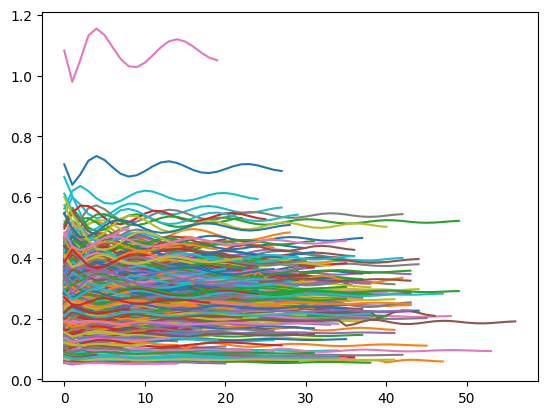

In [3]:
fig, ax = plt.subplots()

for name, group in big_df.groupby("pcp"):
    ax.plot(group["branch_length"].reset_index(drop=True))

plt.show()

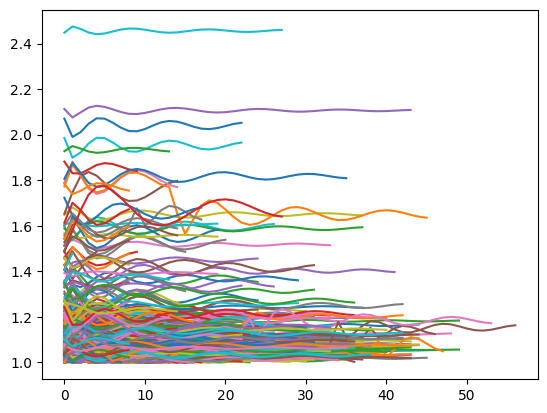

In [4]:
fig, ax = plt.subplots()

for name, group in big_df.groupby("pcp"):
    ax.plot(group["sums_too_big"].reset_index(drop=True))

plt.show()

<Axes: >

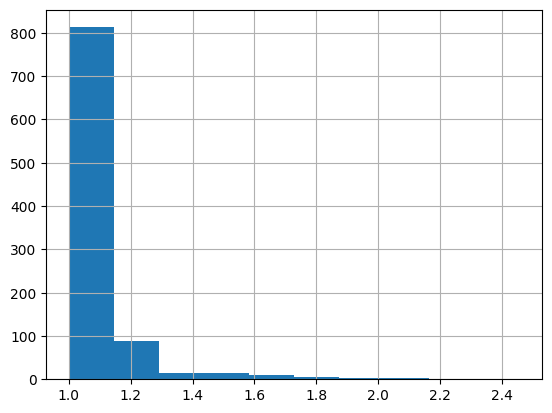

In [5]:
big_df.groupby("pcp")["sums_too_big"].mean().hist()

<Axes: xlabel='aa'>

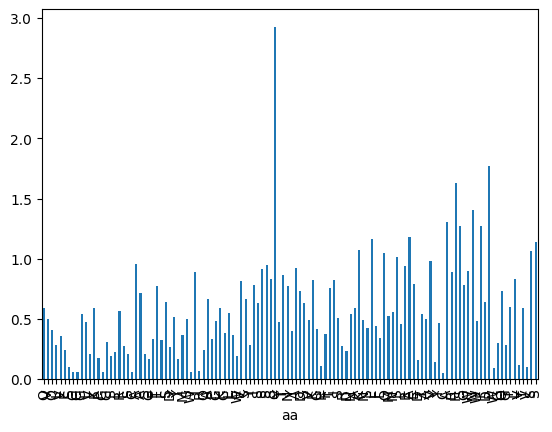

In [6]:
model_plus1 = load_crepe("../dnsm-train/trained_models/dnsm_plus1_sml-tang250-joint").model
model_lin = load_crepe("../dnsm-train/trained_models/dnsm_lin_sml-tang250-joint").model
model_default = load_crepe("../dnsm-train/trained_models/dnsm_sml-tang250-joint").model

big_parent_row = big_df.loc[big_df["sums_too_big"].idxmax()]
big_parent_nt = big_parent_row["parent"]
big_parent = translate_sequence(big_parent_nt)
big_parent_pcp = big_parent_row["pcp"]

big_parent_df = pd.DataFrame(
    {
        "aa": list(big_parent),
        "selection_plus1": model_plus1.selection_factors_of_aa_str(big_parent).detach().numpy(),
        "selection_lin": model_lin.selection_factors_of_aa_str(big_parent).detach().numpy(),
        "selection_default": model_default.selection_factors_of_aa_str(big_parent).detach().numpy(),
    }
)
big_parent_df.set_index("aa", inplace=True)
big_parent_df["position"] = range(1, len(big_parent_df) + 1)
big_parent_df["selection_lin"].plot.bar()


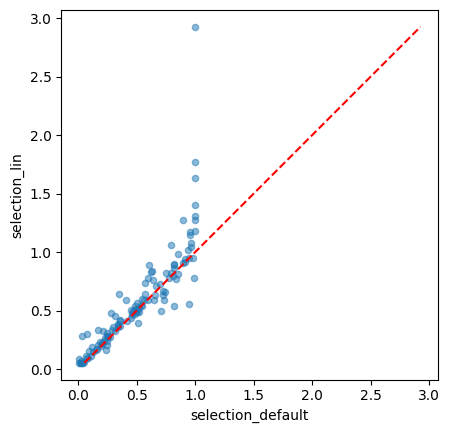

In [7]:
import matplotlib.pyplot as plt

alt_model = "selection_lin"
big_parent_df.plot.scatter(x="selection_default", y=alt_model, alpha=0.5)

# Add a line at y = x
plt.plot([big_parent_df[alt_model].min(), big_parent_df[alt_model].max()], 
         [big_parent_df[alt_model].min(), big_parent_df[alt_model].max()], 
         color='red', linestyle='--')

# Set aspect of the plot to be equal, making it square
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


In [8]:
big_parent_df[big_parent_df["selection_lin"] > 1]

,selection_plus1,selection_lin,selection_default,position
aa,,,,
C,1.167077,2.927216,0.998242,56
K,1.090511,1.076476,0.961448,76
L,1.045539,1.168160,0.959381,79
Q,1.035767,1.044666,0.962037,82
S,0.972326,1.014235,0.937566,85
A,1.276198,1.180837,0.998403,88
A,0.962392,1.306083,0.998714,97
H,1.682347,1.632249,0.998920,99
S,1.005062,1.271887,0.998538,100


<Axes: >

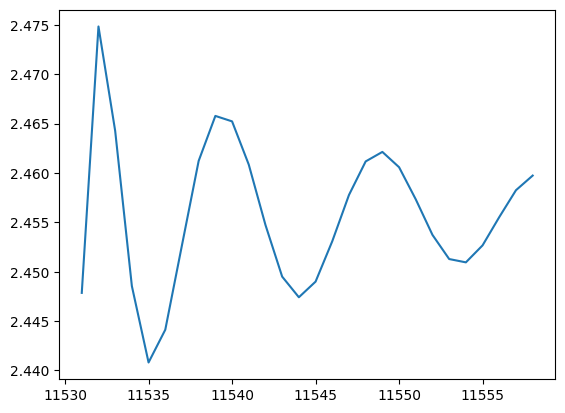

In [9]:
big_parent_history = big_df.loc[big_df["pcp"] == big_parent_pcp]
big_parent_history["sums_too_big"].plot()